In [119]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# library for correlational analysis
from scipy import stats

In [120]:
# Libraries for geographic analysis
!pip install pandas folium
import folium
from sklearn.cluster import KMeans

Defaulting to user installation because normal site-packages is not writeable


#### Loading Dataset

In [121]:
data=pd.read_csv('Dataset.csv')
old_data=pd.DataFrame(data)

In [122]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 1

## TASK 1: Top Cuisines

### Q1. Determine the top 3 most common cuisines in the dataset.

In [123]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [124]:
data['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

#### Splitting cuisines for better understanding

In [125]:
# spliiting cuisines
data['new_cuisines']=data['Cuisines'].str.split(', ')
# converting list of substrings into multiple rows
data=data.explode('new_cuisines')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,new_cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Cafe
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Italian
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,World Cuisine
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Restaurant Cafe


In [126]:
data['new_cuisines'].value_counts().head(3)

new_cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

#### => Top 3 Cuisines are: North Indian,Chinese and Fast Food

### Q2. Calculate the percentage of restaurant that serve each of top cuisines

##### Percentage of North Indian

In [127]:
ni_count=data[data['new_cuisines']=='North Indian']['Restaurant ID'].count()
ni_percent=round(ni_count*100/data['Restaurant ID'].count(),2)
print("Percentage of Resturant serving North Indian Cuisines:",ni_percent,"%")


Percentage of Resturant serving North Indian Cuisines: 20.08 %


##### Percentage of Chinese

In [128]:
ch_count=data[data['new_cuisines']=='Chinese']['Restaurant ID'].count()
ch_percent=round(ch_count*100/data['Restaurant ID'].count(),2)
print("Percentage of Resturant serving Chinese Cuisines:",ch_percent,"%")

Percentage of Resturant serving Chinese Cuisines: 13.87 %


##### Percentage of Fast Food

In [129]:
ff_count=data[data['new_cuisines']=='Fast Food']['Restaurant ID'].count()
ff_percent=round(ff_count*100/data['Restaurant ID'].count(),2)
print("Percentage of Resturant serving Fast Food Cuisines:",ff_percent,"%")

Percentage of Resturant serving Fast Food Cuisines: 10.07 %


## TASK 2: City Analysis

In [130]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,new_cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Seafood


In [131]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'new_cuisines'],
      dtype='object')

### Q1. Identify the city with highest no. of resturant in the dataset?

In [132]:
old_data['City'].value_counts().to_dict()

{'New Delhi': 5473,
 'Gurgaon': 1118,
 'Noida': 1080,
 'Faridabad': 251,
 'Ghaziabad': 25,
 'Bhubaneshwar': 21,
 'Amritsar': 21,
 'Ahmedabad': 21,
 'Lucknow': 21,
 'Guwahati': 21,
 'Ludhiana': 20,
 'Rest of Hawaii': 20,
 'Kochi': 20,
 'Kolkata': 20,
 'Pocatello': 20,
 'Pensacola': 20,
 'Mumbai': 20,
 'Mangalore': 20,
 'Singapore': 20,
 'Orlando': 20,
 'Mysore': 20,
 'Nagpur': 20,
 'Nashik': 20,
 'Coimbatore': 20,
 'Dehradun': 20,
 'Savannah': 20,
 'Tampa Bay': 20,
 'Sioux City': 20,
 'Abu Dhabi': 20,
 'Bangalore': 20,
 'Aurangabad': 20,
 'Allahabad': 20,
 'Agra': 20,
 'Sharjah': 20,
 'Dubai': 20,
 'Goa': 20,
 'Bhopal': 20,
 'Chennai': 20,
 'Waterloo': 20,
 'Indore': 20,
 'Valdosta': 20,
 'Puducherry': 20,
 'Kanpur': 20,
 'Jaipur': 20,
 'Patna': 20,
 'Macon': 20,
 'Edinburgh': 20,
 'London': 20,
 'Manchester': 20,
 'Pune': 20,
 'Cedar Rapids/Iowa City': 20,
 'Boise': 20,
 'Cape Town': 20,
 'Augusta': 20,
 'Athens': 20,
 'Albany': 20,
 'S��o Paulo': 20,
 'Rio de Janeiro': 20,
 'Bras�_lia

#### => New Delhi have highest Number of resturants

### Q2. Calculate the average rating for restaurants in each city.

In [133]:
avg_col=['City','Aggregate rating']
group=data[avg_col].groupby(['City']).mean()
group


,Aggregate rating
City,
Abu Dhabi,4.239130
Agra,3.965306
Ahmedabad,4.131579
Albany,3.559091
Allahabad,3.387234
...,...
Weirton,3.900000
Wellington City,4.217647
Winchester Bay,3.200000


### Q3. Determine the city with highest average rating.

In [134]:
group.sort_values('Aggregate rating').tail(1)

,Aggregate rating
City,
Inner City,4.9


#### => Inner city has highest average rating

## TASK 3: Price Range Distribution

### Q1. Create a histogram/bar chart to visualize distribution of price ranges among the restaurants

Text(0.5, 1.0, 'Price Range Distribution')

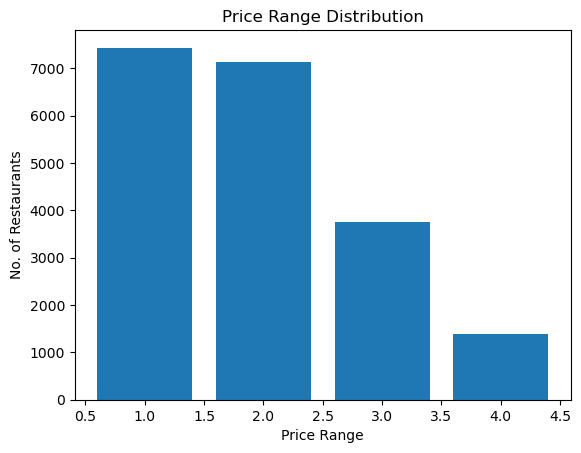

In [135]:
d=data['Price range'].value_counts().to_dict()
x=d.keys()
height=d.values()
x
plt.bar(x,height)
plt.xlabel("Price Range")
plt.ylabel("No. of Restaurants")
plt.title("Price Range Distribution")

#### => Maximum resturants have price range of 1

### Q2. Calculate the percentage of restaurants in each price range category

In [136]:
price_label=data['Price range'].unique().tolist()
percentage=list()
for i in price_label:
    price=data[data['Price range']==i]['Restaurant ID'].count()
    percent=price*100/data['Price range'].count()
    percentage.append(round(percent,2))
percentage


[19.07, 7.05, 36.17, 37.7]

Text(0.5, 1.0, 'Percentage of Restaurants in each price range category')

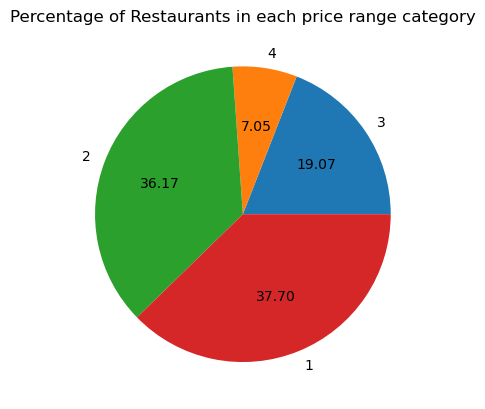

In [137]:
plt.pie(percentage,labels=price_label,autopct='%.2f')
plt.title("Percentage of Restaurants in each price range category")

## TASK 4: Online Delivery

### Q1. Determine percentage of restaurants that offer online delivery

In [138]:
online=data['Has Online delivery'].value_counts() ['Yes']
online_percent=online*100/data['Restaurant ID'].count()
round(online_percent,2)

29.42

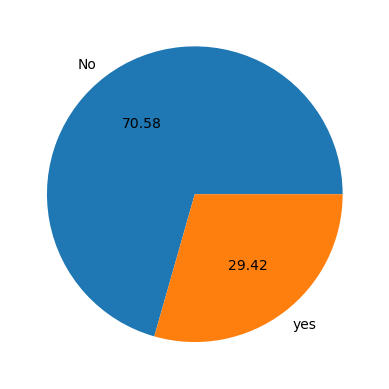

In [139]:
online=data['Has Online delivery'].value_counts().to_list()
label=['No','yes']
plt.pie(online,labels=label,autopct='%.2f')
plt.show()

#### => 29.42% restaurants offer online delivery

### Q2. Compare average ratings of restaurants with and online delivery

In [140]:
y_mean=data.loc[data['Has Online delivery']=='Yes','Aggregate rating'].mean()
print("Average rating for online delivery",round(y_mean,2))

Average rating for online delivery 3.31


In [141]:
n_mean=data.loc[data['Has Online delivery']=='No','Aggregate rating'].mean()
print("Average rating for online delivery",round(n_mean,2))

Average rating for online delivery 2.68


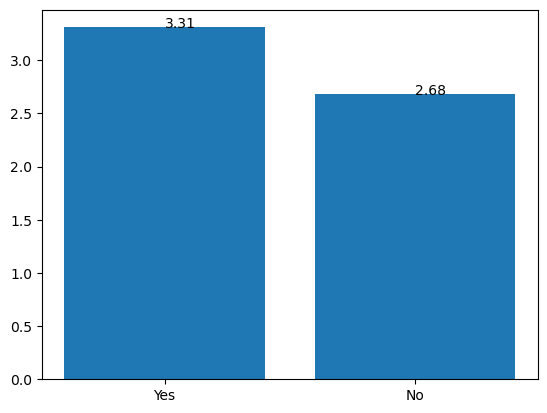

In [142]:
x=["Yes","No"]
height=list()
height.append(round(y_mean,2))
height.append(round(n_mean,2))
plt.bar(x,height)
for i in range(len(x)):
    plt.text(i,height[i],height[i])

# LEVEL 2

## TASK 1: Resturant Ratings

### Q1. Analyze the distribution of aggregate ratings and determine the most common rating range

In [143]:
# for i in rate:
#     minr=data.loc[data['Rating text']==i,'Aggregate rating'].min()
#     print("minimum of ",i,":",minr)
#     # maxr=data.loc[data['Rating text']==i,'Aggregate rating'].max()
#     print("maximum of ",i,":",maxr)
    

In [144]:
# bins=[0,1.8,2.5,3.5,4.0,4.5,5]
# group_name=['Not Rated','Poor','Average','Good','Very Good','Excellent']
# data['Aggregate rating bins']=pd.cut(data['Aggregate rating'],bins,labels=group_name,include_lowest=True)

[Text(0, 0, '3443'),
 Text(0, 0, '8'),
 Text(0, 0, '3018'),
 Text(0, 0, '9924'),
 Text(0, 0, '3326')]

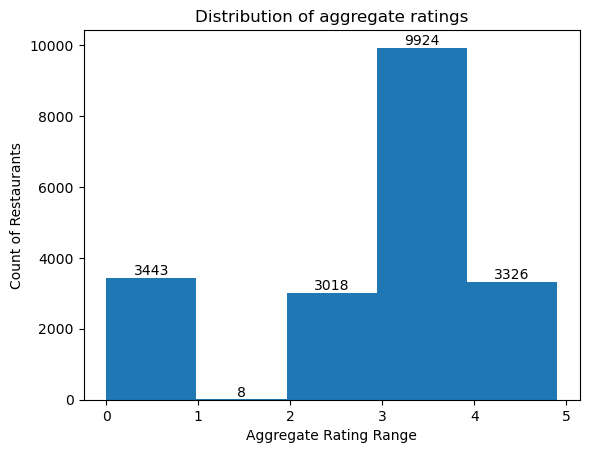

In [145]:
n,bins,patches=plt.hist(data['Aggregate rating'],bins=5)
# plt.xticks(ticks=[0,1,2,3,4,5],labels=['not rated','poor','average','good','verygood','excellent'])
plt.xlabel("Aggregate Rating Range")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of aggregate ratings")
plt.bar_label(patches)

#### => Mostly restaurants are rated between 3 and 4

### Q2. Calculte the average number of votes recieved by restaurants

In [146]:
votes=data['Votes'].mean()
round(votes,0)

199.0

#### => Average number of votes received by restaurants is 199

## TASK 2: Cuisine Combination

#### Q1. Identify the most common combinations of cuisines in the dataset.

In [147]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'new_cuisines'],
      dtype='object')

In [148]:
data['Cuisines'].mode()

0    North Indian, Chinese
Name: Cuisines, dtype: object

#### => Most common combination of cuisines is: North Indian, Chinese

### Q2. Determine if certain cuisine combinations tend to have higher ratings

In [149]:
# Identifying maximum rating recieved
max_rate=data['Aggregate rating'].max()
max_rate

4.9

#### Cuisine combinations with highest ratings

In [150]:
high_cuisine=data.loc[data['Aggregate rating']==max_rate,'Cuisines'].unique().tolist()
print("List of combination of cuisines with highest rating:")
high_cuisine

List of combination of cuisines with highest rating:


['Japanese, Sushi',
 'European, Asian, Indian',
 'Filipino, Mexican',
 'International',
 'Brazilian, Bar Food',
 'American, Caribbean, Seafood',
 'Burger',
 'BBQ, Breakfast, Southern',
 'Asian',
 'American, Coffee and Tea',
 'Sandwich, Seafood, Cajun',
 'Pizza, Sandwich',
 'American, Sandwich, Tea',
 'American, BBQ, Sandwich',
 'Burger, Bar Food, Steak',
 'Hawaiian, Seafood',
 'Japanese',
 'Italian, Deli',
 'European, German',
 'Indian, North Indian',
 'Continental, Indian',
 'Indian',
 'Cafe, North Indian, Chinese',
 'Fast Food',
 'North Indian, European, Mediterranean',
 'Bakery, Desserts',
 'North Indian',
 'Mexican, American, Healthy Food',
 'European, Mediterranean, North Indian',
 'Italian, Bakery, Continental',
 'North Indian, Chinese',
 'Mughlai, Lucknowi',
 'North Indian, South Indian, Mughlai',
 'Ice Cream',
 'Modern Indian',
 'North Indian, Chinese, Mediterranean',
 'Sunda, Indonesian',
 'Sushi, Japanese',
 'Desserts',
 'Steak',
 'British',
 'Taiwanese, Street Food',
 'Ameri

## TASK 3: Geographic Analysis

### Q1. Plot the locations of restaurants on a map using longitude and latitude coordiantes.

In [151]:
# Initailizing map centered around an average location
map_center=[old_data['Latitude'].mean(),old_data['Longitude'].mean()]
restaurant_map=folium.Map(location=map_center,zoom_start=12)
restaurant_map

In [152]:
# Adding points to the map
for index,row in old_data.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup=row['Restaurant Name']).add_to(restaurant_map)

# Save map to an html file
restaurant_map.save("restaurant_map.html")

### Q2. Identify any patterns or clusters if restaurants in specific areas

In [153]:
# Defining no. of clusters
locations = old_data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=0) 
old_data['Cluster'] = kmeans.fit_predict(locations)

# Defining colors for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Adding points to map with cluster colors
for index, row in old_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=row['Restaurant Name'],
        color=colors[row['Cluster']],
        fill=True,
        fill_color=colors[row['Cluster']]
    ).add_to(restaurant_map)
restaurant_map.save('clustered_restaurant_map.html')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## TASK 4 Restaurant Chains

### Q1. Identify if there are any chains present in the dataset.

In [154]:
count=old_data['Restaurant Name'].value_counts()
chain=count[count>1].index.tolist()
print("Restaurant with chains")
chain

Restaurant with chains


['Cafe Coffee Day',
 "Domino's Pizza",
 'Subway',
 'Green Chick Chop',
 "McDonald's",
 'Keventers',
 'Pizza Hut',
 'Giani',
 'Baskin Robbins',
 'Barbeque Nation',
 "Giani's",
 'Barista',
 "Dunkin' Donuts",
 'Costa Coffee',
 'Pind Balluchi',
 'Wah Ji Wah',
 'Twenty Four Seven',
 'Pizza Hut Delivery',
 'Sagar Ratna',
 'Republic of Chicken',
 'KFC',
 'Starbucks',
 'Chaayos',
 'Burger King',
 "Haldiram's",
 'Shree Rathnam',
 'Frontier',
 'Moti Mahal Delux',
 'Bikanervala',
 'Aggarwal Sweets',
 'Behrouz Biryani',
 "Karim's",
 'Bikaner Sweets',
 'Chicago Pizza',
 'Apni Rasoi',
 '34, Chowringhee Lane',
 'Wow! Momo',
 'Madras Cafe',
 'Burger Point',
 'Gopala',
 'Shama Chicken Corner',
 "Berco's",
 "Nirula's Ice Cream",
 'Sardar A Pure Meat Shop',
 'Yo! China',
 'Cocoberry',
 'Punjabi Tadka',
 'Angels in my Kitchen',
 'Faasos',
 'Ovenstory Pizza',
 'Chowringhee',
 'Punjabi Chaap Corner',
 'Kebab Xpress',
 'Nazeer Foods',
 'RollsKing',
 'Tpot',
 'Mocha',
 'Dolce Gelato',
 "Tibb's Frankie",
 'The

### Q2. Analyze the ratings and popularity of different restaurant chains.

In [155]:
# Filter data for restaurant with chains
chain_data=old_data[old_data['Restaurant Name'].isin(chain)]
chain_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cluster
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,0
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,No,No,No,No,3,4.9,Dark Green,Excellent,1070,0
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,No,No,No,No,3,4.8,Dark Green,Excellent,294,0
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,No,No,No,No,4,4.2,Green,Very Good,17,2
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,No,No,No,No,4,4.9,Dark Green,Excellent,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,6001980,Timboo Cafe,208,Ankara,"Armada AVM, Kat -1, Eski��ehir Yolu, No 6, Yen...","Armada AVM, S�_���_t�_z�_, Yenimahalle","Armada AVM, S�_���_t�_z�_, Yenimahalle, Ankara",32.809247,39.913206,Cafe,...,No,No,No,No,3,4.2,Green,Very Good,134,4
9528,6003668,Timboo Cafe,208,Ankara,"Kentpark AVM, Kat -1, Mustafa Kemal Mahallesi,...","Kentpark AVM, ��niversiteler, �ankaya","Kentpark AVM, ��niversiteler, �ankaya, Ankara",32.776255,39.908957,Cafe,...,No,No,No,No,3,4.2,Green,Very Good,79,4
9534,6004089,D�_vero��lu,208,Ankara,"Maltepe Mahallesi, Gen�_lik Caddesi, No 28, �a...",Maltepe,"Maltepe, Ankara",32.842742,39.922536,"Kebab, Desserts, Turkish Pizza",...,No,No,No,No,3,4.4,Green,Very Good,131,4
9535,6000921,D�_vero��lu,208,Ankara,"��mitk�_y Mahallesi, 2432. Cadde (8. Cadde), N...",��mitk�_y,"��mitk�_y, Ankara",32.701775,39.891564,"Kebab, Desserts, Turkish Pizza",...,No,No,No,No,3,4.2,Green,Very Good,152,4


In [156]:
# Grouping Average rating and Votes for each chain
avg_chain_rate=chain_data.groupby('Restaurant Name')['Aggregate rating'].mean()
avg_chain_vote=chain_data.groupby('Restaurant Name')['Votes'].sum()
chain_table=pd.DataFrame({'Average Rating':avg_chain_rate,"Total Votes":avg_chain_vote})
chain_table.sort_values('Average Rating',ascending=False)

,Average Rating,Total Votes
Restaurant Name,,
Talaga Sampireun,4.900,5514
Silantro Fil-Mex,4.850,1364
AB's Absolute Barbecues,4.850,3151
AB's - Absolute Barbecues,4.825,13400
Naturals Ice Cream,4.800,3094
...,...,...
Big Biryani,0.000,1
Flavours Kitchen,0.000,3
Anand Sweets,0.000,3


# LEVEL 3

## TASK 1: Restaurant Reviews

### Q1. Analyze the text reviews to identify the most common positive and negative keywords

In [157]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'new_cuisines'],
      dtype='object')

In [158]:
old_data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

## TASK 2: Vote Analysis

### Q1. Identify the restaurants with highest and lowest no. of votes

#### Restaurants with highest number of votes

In [159]:
max=old_data['Votes'].max()
old_data[old_data['Votes']==max]['Restaurant Name'].to_dict()
# chain=count[count>1].index.tolist()

{728: 'Toit'}

#### ` Restaurants with lowest number of votes

In [160]:
min=old_data['Votes'].min()
old_data[old_data['Votes']==min]['Restaurant Name'].to_dict()

{69: 'Cantinho da Gula',
 874: 'The Chaiwalas',
 879: 'Fusion Food Corner',
 880: 'Punjabi Rasoi',
 887: 'Baskin Robbin',
 900: 'Angaar',
 901: 'TcozY',
 902: 'The Retriever',
 905: "Chill 'N Grill",
 906: 'Punjabi Restaurant',
 907: 'Standard Chicken Point',
 908: 'The Grillz & Gravy',
 912: 'Little Cafe',
 918: "Giani's",
 920: 'New Dilight',
 927: 'City Dhaba',
 928: 'Garam Masala',
 929: 'Mittal Fast Food',
 970: 'Apna Restaurant',
 971: 'Chaudhary Chaap & Chinese',
 972: 'Chings Chinese',
 973: 'Food On Wheels',
 975: 'Maa Kali Foods',
 976: 'The Street Kitchen',
 977: 'United Kitchen',
 995: 'Bikaneri Sweets & Restaurant',
 998: 'Food Station',
 1002: 'The BBQ Garden',
 1003: 'The Chaiwalas',
 1006: 'Hungry Head',
 1007: 'Tandoori Hut',
 1015: 'Fritrolla',
 1016: 'KitchenYard',
 1022: 'Bikaner Misthan Bhandar',
 1024: 'Muradabadi Chicken Biryani Corner',
 1025: 'The Black Kettle',
 1037: 'Biryani Bot',
 1038: 'Caf�� Kitchen',
 1040: 'Magic Spice Wok',
 1041: 'Magical Momos',
 104

### Q2. Analyze if there is a correlation between the no. of votes and rating of a restaurant

In [161]:
pearson_coef,p_value=stats.pearsonr(old_data['Votes'],old_data['Aggregate rating'])
print("Pearson Coefficient:",pearson_coef)
print("P value:",p_value)

Pearson Coefficient: 0.31369058419541146
P value: 4.215149194296304e-217


In [162]:
old_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cluster'],
      dtype='object')

In [164]:
old_data[['Votes','Aggregate rating']].corr()

,Votes,Aggregate rating
Votes,1.000000,0.313691
Aggregate rating,0.313691,1.000000


#### => There is a positive correlation between votes and aggregae raating